In [16]:
import numpy as np
import json
import plotly.express as px
import pandas as pd

In [17]:
with open('../../../карта/map.geojson', encoding="utf-8") as f:
    geojson = json.load(f)

geojson

{'bbox': [-180, 41.18678, 180, 81.857324],
 'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Республика Бурятия',
    'cartodb_id': 10,
    'created_at': '2013-12-04T04:23:51+0100',
    'updated_at': '2013-12-04T08:04:02+0100',
    'name_latin': 'Republic of Buryatia'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[99.230567, 52.963186],
      [99.25523, 52.950453],
      [99.273846, 52.931484],
      [99.258823, 52.93377],
      [99.223225, 52.911944],
      [99.231227, 52.868699],
      [99.204011, 52.87436],
      [99.170972, 52.864426],
      [99.120079, 52.873489],
      [99.103097, 52.882524],
      [99.021124, 52.905575],
      [98.973497, 52.934314],
      [98.96272, 52.930178],
      [98.937518, 52.937471],
      [98.909813, 52.900949],
      [98.893212, 52.896349],
      [98.901703, 52.872509],
      [98.872365, 52.86478],
      [98.860934, 52.839878],
      [98.850266, 52.832802],
      [98.86948, 52.813806],
      [98.8508

In [18]:
labels = np.load('data/labels.npy', allow_pickle=True)

In [19]:
start_city = 12
duration = 300
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

scatter_data = {
    'lag': lags,
    'region': labels,
    'flow': flows
}

scatter_data = pd.DataFrame(scatter_data)
scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data

,lag,region,flow
0,88,Республика Бурятия,2.466654e-06
1,82,Карачаево-Черкесская Республика,7.071472e-06
2,97,Сахалинская область,6.658108e-07
3,40,Воронежская область,1.348339e-04
4,79,Томская область,5.662313e-06
...,...,...,...
84,53,Республика Крым,3.643851e-05
85,60,Херсонская область,2.321386e-05
86,39,Запорожская область,4.387845e-05
87,44,Донецкая Народная Республика,6.885636e-05


In [20]:
fig = px.scatter(scatter_data, x='flow', y='lag', log_x=True, hover_name='region', trendline="ols", trendline_options=dict(log_x=True), title=f'Начало в регионе {labels[start_city]}, без Дейкстры')
fig.show()

In [21]:
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]

print(log_flows)

import scipy.sparse as sps

graph = sps.csr_array(log_flows)

dist_matrix, predecessors = sps.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
dist_matrix

scatter_data = {
    'lag': lags,
    'region': labels,
    'flow': dist_matrix[start_city,:]
}

scatter_data = pd.DataFrame(scatter_data)
scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data

[[16.          5.98872441  5.5312697  ...  5.45806419  5.30796405
   5.48457664]
 [ 5.67009762 16.          6.24280557 ...  4.08626776  3.91296793
   4.15838811]
 [ 5.20962293  6.23978559 16.         ...  5.69404388  5.55140259
   5.73376977]
 ...
 [ 5.68906787  4.63589823  6.24669433 ... 16.          3.12537653
   3.71279186]
 [ 5.66672057  4.59035125  6.23180589 ...  3.25312937 16.
   3.21176932]
 [ 5.64753737  4.63997562  6.21837728 ...  3.6447489   3.01597352
  16.        ]]


,lag,region,flow
0,88,Республика Бурятия,4.484211
1,82,Карачаево-Черкесская Республика,3.708182
2,97,Сахалинская область,4.731321
3,40,Воронежская область,3.119305
4,79,Томская область,4.159122
...,...,...,...
84,53,Республика Крым,3.610839
85,60,Херсонская область,3.526555
86,39,Запорожская область,3.465071
87,44,Донецкая Народная Республика,3.397131


In [22]:
fig = px.scatter(scatter_data, x='flow', y='lag', log_x=True, hover_name='region', trendline="ols", trendline_options=dict(log_x=True), title=f'Начало в регионе {labels[start_city]}, Флойд-Варшалл')
fig.show()

In [23]:
# start_city = 12
# duration = 300
# dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
# flows = np.load('data/flows.npy', allow_pickle=True)

# scatter_data = {
#     'lag': np.array([np.argmax(dt[j,:]) - np.argmax(dt[i,:]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'start': np.array([labels[i] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'region': np.array([labels[j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
#     'log_flow': np.array([np.log10(flows[i, j]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0])
# }

# scatter_data = pd.DataFrame(scatter_data)
# # scatter_data = scatter_data[scatter_data['lag'] > 0]
# scatter_data[scatter_data['start'] == 'Москва'].sort_values(by='log_flow')

dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
flows = np.load('data/flows.npy', allow_pickle=True)

scatter_data = {
    'lag': np.array([np.argmax(dt[j,:]) - np.argmax(dt[i,:]) for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'start': np.array([labels[i] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'region': np.array([labels[j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0]),
    'log_flow': np.array([dist_matrix[i,j] for i in range(len(labels)) for j in range(len(labels)) if (np.argmax(dt[j,:]) - np.argmax(dt[i,:])) > 0])
}

scatter_data = pd.DataFrame(scatter_data)
# scatter_data = scatter_data[scatter_data['lag'] > 0]
scatter_data[scatter_data['start'] == 'Москва'].sort_values(by='log_flow')

,lag,start,region,log_flow
255,5,Москва,Московская область,1.071233
274,29,Москва,Калужская область,2.398682
273,27,Москва,Тульская область,2.419738
254,25,Москва,Владимирская область,2.512546
272,33,Москва,Тверская область,2.580684
...,...,...,...,...
309,100,Москва,Хабаровский край,4.660528
308,85,Москва,Еврейская АО,4.685019
245,79,Москва,Камчатский край,4.726114
246,96,Москва,Приморский край,4.726684


In [24]:
import scipy.stats as sps

slopes = []
r2_threshold = 0.5

for start in scatter_data['start'].unique():
    slope, intercept, r_value, p_value, std_err = sps.linregress(
        x = scatter_data[scatter_data['start'] == start]['log_flow'], 
        y = scatter_data[scatter_data['start'] == start]['lag']
    )

    scatter_data.loc[scatter_data['start'] == start, 'r2'] = r_value**2
    scatter_data.loc[scatter_data['start'] == start, 'slope'] = slope
    if r_value**2 > r2_threshold:
        slopes.append(slope)

np.sort(scatter_data['r2'].unique())[::-1]
scatter_data

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10919: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10933: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:10936: RuntimeWarning:

invalid value encountered in scalar divide



,lag,start,region,log_flow,r2,slope
0,9,Республика Бурятия,Сахалинская область,5.209623,0.085015,12.453008
1,13,Республика Бурятия,Ненецкий автономный округ,5.400387,0.085015,12.453008
2,24,Республика Бурятия,Магаданская область,5.300007,0.085015,12.453008
3,8,Республика Бурятия,Приморский край,4.834121,0.085015,12.453008
4,6,Республика Бурятия,Республика Алтай,4.914227,0.085015,12.453008
...,...,...,...,...,...,...
3860,40,Луганская Народная Республика,г. Севастополь,4.187013,0.470707,22.557889
3861,19,Луганская Народная Республика,Республика Крым,3.942112,0.470707,22.557889
3862,26,Луганская Народная Республика,Херсонская область,3.997368,0.470707,22.557889
3863,5,Луганская Народная Республика,Запорожская область,3.644749,0.470707,22.557889


In [25]:
fig = px.scatter(scatter_data[scatter_data['r2'] > r2_threshold], x='log_flow', y='lag', color='start', hover_name='region', trendline="ols")
fig.show()

[Text(0.5, 1.0, 'Начало в Москва')]

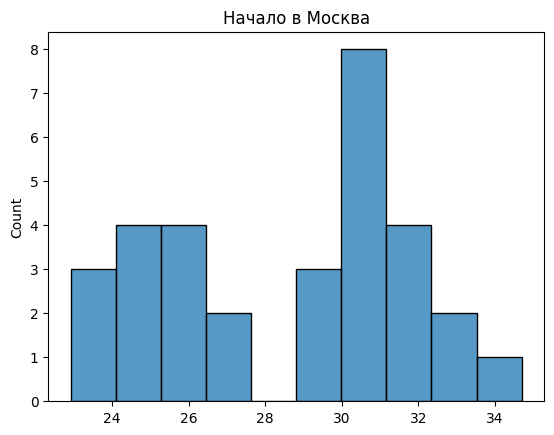

In [26]:
import seaborn as sns

slopes = np.array(slopes)
slopes = slopes[slopes > 0]
sns.histplot(slopes, bins=10).set(title=f'Начало в {labels[start_city]}')

In [27]:
start_city = 12
duration = 300
step = 5
dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
flows = np.load('data/flows.npy', allow_pickle=True)

map_data = {
    'day': np.array([j for _ in range(len(labels)) for j in range(0, duration, step)]),
    'region': np.array([labels[i] for i in range(len(labels)) for _ in range(0, duration, step)]),
    'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
}

map_data = pd.DataFrame(map_data)
map_data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8164\4248661594.py:10: RuntimeWarning:

invalid value encountered in scalar divide



,day,region,new_infections
0,0,Республика Бурятия,0.000000
1,5,Республика Бурятия,0.000000
2,10,Республика Бурятия,0.000000
3,15,Республика Бурятия,0.000000
4,20,Республика Бурятия,0.000000
...,...,...,...
5335,275,Луганская Народная Республика,0.000391
5336,280,Луганская Народная Республика,0.000196
5337,285,Луганская Народная Республика,0.000391
5338,290,Луганская Народная Республика,0.000000


In [28]:
# fig = px.choropleth_mapbox(
#     map_data,
#     geojson=geojson,
#     locations='region',
#     color='new_infections',
#     featureidkey="properties.name",
#     animation_frame='day',
#     mapbox_style="carto-positron",
#     zoom=2.5,
#     center={"lat": 60, "lon": 95},  # координаты центра
#     color_continuous_scale="Viridis",
#     range_color=[map_data['new_infections'].min(), map_data['new_infections'].max()]
# )

# # Настройка анимации
# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
# fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 200

# # Настройка отображения
# fig.update_layout(
#     margin={"r":0,"t":0,"l":0,"b":0},
#     coloraxis_colorbar={
#         'title': 'Value'
#     }
# )

# fig.write_html(f"{labels[start_city]}.html")

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

gdf = gpd.read_file('../../../карта/map.geojson')

selected_days = [80, 125, 145, 165, 185]
lbls = ['Приморском крае', 'Москве']

A4_WIDTH = 8.27 
A4_HEIGHT = 11.69/1

with PdfPages('graphs/country_map.pdf') as pdf:
    fig, axes = plt.subplots(len(selected_days), 2, figsize=(A4_WIDTH, A4_HEIGHT))
    for j, start_city in enumerate([9, 12]):
        duration = 300
        step = 5
        dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]
        flows = np.load('data/flows.npy', allow_pickle=True)

        map_data = {
            'day': np.array([j for _ in range(len(labels)) for j in range(0, duration, step)]),
            'region': np.array([labels[i] for i in range(len(labels)) for _ in range(0, duration, step)]),
            'new_infections': np.array([dt[i,j]/np.max(dt[i,:]) for i in range(len(labels)) for j in range(0, duration, step)])
        }

        map_data = pd.DataFrame(map_data)

        
        for i, day in enumerate(selected_days):
            ax = axes[i, j]

            day_data = map_data[map_data['day'] == day]
            
            
            merged = gdf.merge(day_data, 
                            left_on='name', 
                            right_on='region',
                            how='left')
            

            merged.plot(column='new_infections', 
                    ax=ax, 
                    cmap='magma',
                    vmin=map_data['new_infections'].min(),
                    vmax=map_data['new_infections'].max(),
                    missing_kwds={'color': 'lightgrey'})
            
            ax.set_title(f'День {day}, начало в {lbls[j]}')
            ax.set_axis_off()
            ax.set_xlim([15, 180]) 
            ax.set_ylim([41, 77]) 
    
    plt.tight_layout()
    pdf.savefig(fig)
    plt.savefig('graphs/country_map.png', dpi=600)
    plt.close()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8164\4201318342.py:25: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8164\4201318342.py:25: RuntimeWarning:

invalid value encountered in scalar divide



116.44296953075391 1.3195810946924889 0.00412414143383418
10.56763606748895
184.76119676028088 14.21128437682018 0.2249043469238221
-52.97788398624446 -24.001494482301684 0.81616895310651
10.19185182165958
-50.80839617080705 -30.642190482963418 0.7068649683593767


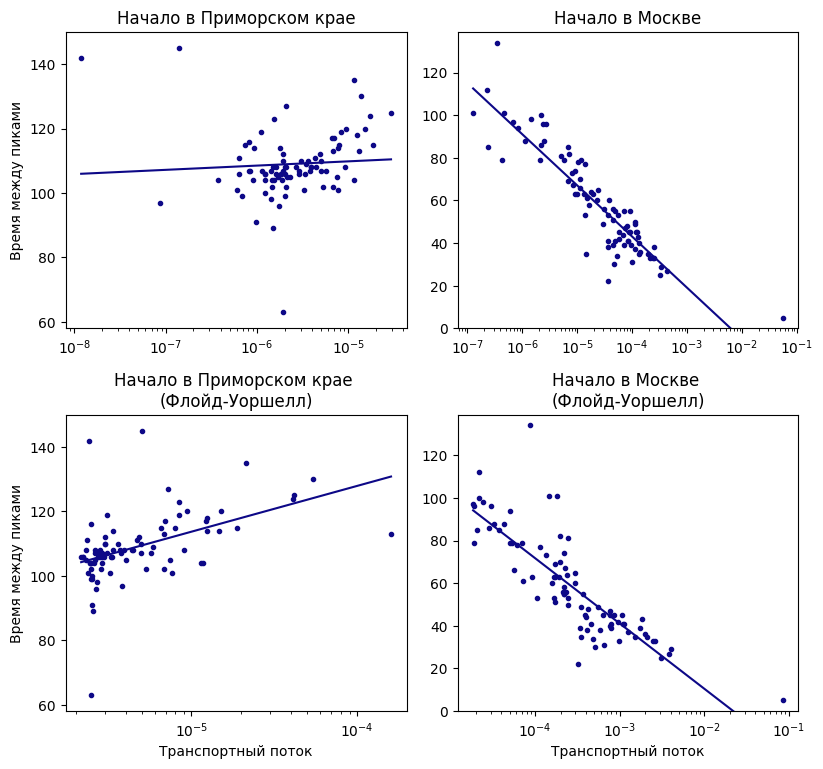

In [30]:
import scipy.sparse as sparse
import scipy.stats as sps

duration = 300
colors = plt.cm.plasma(np.linspace(0, 1, 2))

fig, axes = plt.subplots(2, 2, figsize=(A4_WIDTH, A4_HEIGHT/1.5))

for j, start_city in enumerate([9, 12]):
    dt = np.load(f'pkls/{labels[start_city]}.npy', allow_pickle=True)[0,:,0,:duration]

    lags = np.array([np.argmax(dt[i,:]) - np.argmax(dt[start_city,:]) for i in range(len(labels))])
    flows = np.load('data/flows.npy', allow_pickle=True)[start_city,:]

    scatter_data = {
        'lag': lags,
        'region': labels,
        'flow': flows
    }

    scatter_data = pd.DataFrame(scatter_data)
    scatter_data = scatter_data[scatter_data['lag'] > 0]
    
    axes[0,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[0])

    slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
    x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
    axes[0,j].plot(10**x, intercept + slope * x, color=colors[0])

    axes[0,j].set_xscale('log')
    axes[0,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
    if j==0:
        axes[0,j].set_ylabel('Время между пиками')
    axes[0,j].set_title(f'Начало в {lbls[j]}')
    print(intercept, slope, r**2)
    print(np.std(scatter_data['lag'] - intercept - slope * np.log10(scatter_data['flow'])))

    log_flows = -np.log10(np.load('data/flows.npy', allow_pickle=True) + 1e-16) #[start_city,:]
    graph = sparse.csr_array(log_flows)

    dist_matrix, predecessors = sparse.csgraph.floyd_warshall(csgraph=graph, directed=False, return_predecessors=True)
    dist_matrix

    scatter_data = {
        'lag': lags,
        'region': labels,
        'flow': dist_matrix[start_city,:]
    }

    scatter_data = pd.DataFrame(scatter_data)
    scatter_data = scatter_data[scatter_data['lag'] > 0]
    scatter_data['flow'] = 10**(-scatter_data['flow']) - 1e-16
    # axes[1,j].plot(10**(-scatter_data['flow']) - 1e-16, scatter_data['lag'], '.')

    # slope, intercept, r, p, se = sps.linregress(scatter_data['flow'], scatter_data['lag'])
    # x = np.linspace(np.min(scatter_data['flow']), np.max(scatter_data['flow']), 100)
    # axes[1,j].plot(x, intercept + slope * x)

    # axes[1,j].set_xscale('log')

    axes[1,j].plot(scatter_data['flow'], scatter_data['lag'], '.', color=colors[0])

    slope, intercept, r, p, se = sps.linregress(np.log10(scatter_data['flow']), scatter_data['lag'])
    x = np.linspace(np.min(np.log10(scatter_data['flow'])), np.max(np.log10(scatter_data['flow'])), 100)
    axes[1,j].plot(10**x, intercept + slope * x, color=colors[0])

    axes[1,j].set_xscale('log')
    axes[1,j].set_ylim(np.min(scatter_data['lag'])-5,np.max(scatter_data['lag'])+5)
    axes[1,j].set_xlabel('Транспортный поток')
    if j==0:
        axes[1,j].set_ylabel('Время между пиками')
    axes[1,j].set_title(f'Начало в {lbls[j]} \n(Флойд-Уоршелл)')
    print(intercept, slope, r**2)

plt.tight_layout()
plt.savefig('graphs/country_scatter.pdf')
plt.savefig('graphs/country_scatter.png', dpi=600)
plt.show()
